In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")
df1 = df.copy()
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [7]:
df1 = pd.get_dummies(df1 ,columns=[ 'HomePlanet','CryoSleep','VIP','Transported','Destination'], drop_first=True)
df1.dropna()
df1

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,VIP_True,Transported_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,1,0,0,0,0,0,1
1,0002_01,F/0/S,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,0,0,0,0,1,0,1
2,0003_01,A/0/S,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,1,0,0,1,0,0,1
3,0003_02,A/0/S,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,1,0,0,0,0,0,1
4,0004_01,F/1/S,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,A/98/P,41.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,1,0,0,1,0,0,0
8689,9278_01,G/1499/S,18.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,0,1,0,0,1,0
8690,9279_01,G/1500/S,26.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,0,0,0,0,1,0,1
8691,9280_01,E/608/S,32.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,1,0,0,0,0,0,0


In [8]:
df1.dropna(inplace=True)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X= df1.drop(['PassengerId' , 'Name' ,'Cabin','Transported_True','HomePlanet_Mars'] , axis=1)
y= df1[['Transported_True']]

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures


In [12]:
poly = PolynomialFeatures(degree=3 , include_bias =False)
X = poly.fit_transform(X)

In [13]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rf = RandomForestClassifier(n_estimators=120)

In [17]:
rf.fit(X_train ,y_train)

C:\Users\mohit\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(n_estimators=120)

In [18]:
predict = rf.predict(X_test)

In [14]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(y_test , predict))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77      1068
           1       0.77      0.80      0.78      1112

    accuracy                           0.77      2180
   macro avg       0.78      0.77      0.77      2180
weighted avg       0.78      0.77      0.77      2180



In [15]:
from sklearn import metrics

metrics.mean_squared_error(y_test , predict)

NameError: name 'predict' is not defined

In [17]:
train_mses = []
cv_mses =[]
model = []
scalers = []

for degree in range(1,10):
    
    poly = PolynomialFeatures(degree , include_bias =False)
    X = poly.fit_transform(X_train)
    
    
    scale = StandardScaler()
    X = scale.fit_transform(X)
    
    scalers.append(X)
    
    rf = RandomForestClassifier(n_estimators=120)
    rf.fit(X,y_train)
    model.append(rf)
    
    
    predict =rf.predict(X)
    train_mse = metrics.mean_squared_error(y_train, predict ) / 2
    train_mses.append(train_mse)
    
    poly = PolynomialFeatures(degree , include_bias =False)
    cv = poly.fit_transform(X_test)
    cv = scale.transform(cv)
    
    predit =rf.predict(cv)
    cv_mse = metrics.mean_squared_error(y_test, predit ) / 2
    cv_mses.append(cv_mse)
    
    
    
    

C:\Users\mohit\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\mohit\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\mohit\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\mohit\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\mohit\anaconda3\envs\tf-gpu\lib\site-packages\i

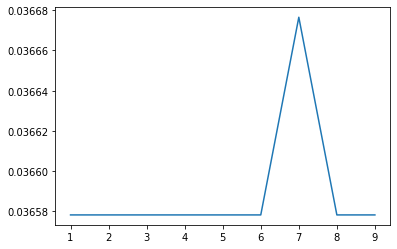

In [18]:
degrees=range(1,10)
plt.plot(degrees, train_mses)

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [22]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train , y_train)

C:\Users\mohit\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\mohit\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[13:52:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
predi = xg.predict(X_test)
predi

array([0, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test , predi))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1068
           1       0.75      0.83      0.79      1112

    accuracy                           0.77      2180
   macro avg       0.78      0.77      0.77      2180
weighted avg       0.78      0.77      0.77      2180



In [27]:
from sklearn.svm import SVC
svr = SVC()

In [28]:
svr.fit(X_train , y_train)
predic = svr.predict(X_test)

C:\Users\mohit\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test , predic))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79      1092
           1       0.81      0.71      0.76      1088

    accuracy                           0.77      2180
   macro avg       0.78      0.77      0.77      2180
weighted avg       0.78      0.77      0.77      2180

